In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Theoritical implementation

#I am predicting the brain weight by seeing head size

In [17]:
print(data.shape)

(237, 4)


In [18]:
indf = data['Head Size(cm^3)'].values    #independent variable
depf = data['Brain Weight(grams)'].values #Dependent varaible

In [19]:
indf.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [20]:
mean_indf = np.mean(indf) 
mean_depf = np.mean(depf) 
n = len(indf)

#Finding M & C 

In [21]:
numer = 0
denom = 0
for i in range(n):
    numer += ((indf[i] - mean_indf) * (depf[i]- mean_depf))
    denom += ((indf[i] - mean_indf)**2)               #whole square operation

m = numer/denom
c = mean_depf - m*(mean_indf)

In [22]:
print(m,c)

0.26342933948939945 325.57342104944223


#Plotting values 

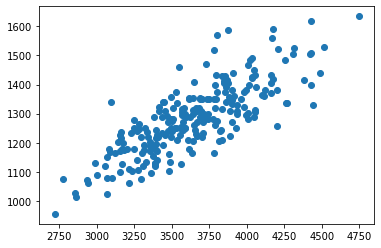

In [23]:
plt.scatter(indf,depf)

In [24]:
max_x = np.max(indf)+100
min_x = np.min(indf)-100

In [25]:
x = np.linspace(min_x, max_x, 1000)     #defining the some x values
y = m*x + c                             

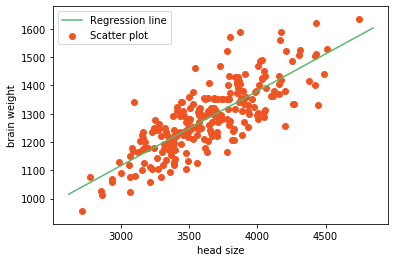

In [26]:
plt.plot(x,y, color='#58b970',label='Regression line')
plt.scatter(indf,depf,c='#ef5423',label='Scatter plot')
plt.xlabel('head size')
plt.ylabel('brain weight')
plt.legend()
plt.show()

#To check the goodness of our model using R^2

In [27]:
r2_num = 0
r2_den = 0

for i in range(n):
    y_p = m*x[i]+c
    r2_num += ((y_p - depf[i])**2)
    r2_den += ((depf[i]- mean_depf)**2)
    
r2 = 1-(r2_num/r2_den)
print(r2)

-3.166831684624621


# Practical implementation using sciket learn

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

indf = indf.reshape((-1,1)) #cannot use rank 1 matrix in scikit learn so reshaping
lr = LinearRegression()     #creating model
lr = lr.fit(indf,depf)     #Fitting training data
y_predict = lr.predict(indf)#Y-prediction
r2_ML = lr.score(indf,depf)    #calculating R2
print(r2_ML)

0.639311719957


In [ ]:
z = np.arange(1000)
plt.plot(z,y_predict)